# Question 1- Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
# import useful modules
import numpy as np
import matplotlib.pyplot as plt
import struct # for reading binary files
from math import cos, sin, pi

# Part A (pseudocode)

In [20]:
##### Reading Data from File #####
# Define file to read
# Open file
# Initialize list / array to store data
# Loop for all 1201*1201 elements (read in order)
# Append element to array
# Reshape array to be 1201 by 1201 (usable nxn) 

##### Calculating the Gradient #####
# Initialize array to store x and y 1d partials
# (we could store both as a 2-d vector, but separate arrays make plotting easy)
# First calculate x partial:
# Loop for each element
# If element is an edge value, do either forward or backwards differences
# If element is not an edge value, do central differences
# Store value in gradient array
# Repeat same steps for y partial

##### Plot w and I #####
# Plot height array using imshow
# Define function to transform partials to Intensity
# ... call gradient function to compute partials
# ... initialize array to store intensity values
# ... loop for all elements
# ... calculate intensities for each element according to equation
# ... return intensity array
# Plot intensity array using imshow

# Part B (code)

In [3]:
filename = 'N19W156.hgt' # Define file to read

datatemp = []
f = open(filename, 'rb')
for i in range(1201*1201):
    buf = f.read(2) # read two bytes
    datatemp.append(struct.unpack('>h', buf)) # ">h" is a signed two-byte integer
datatemp = np.array(datatemp)
data = datatemp.reshape(1201, 1201) # reshape array to make nxn


In [4]:
# define spacing to be used for differentiation
h = 420

In [21]:
# Define a function to compute partial derivatives (essentially the gradient separately)
def partial(z,coordinate,h):
    dz=np.zeros(np.shape(z))
    if coordinate == 'x':
        for i in range(len(z)):
            for j in range(len(z[0])):
                if j==0 or j==1:
                    dz[i][j]=(z[i][j+1]-z[i][j])/h
                elif j==len(z[0])-1 or j==len(z[0])-2:
                    dz[i][j]=(z[i][j]-z[i][j-1])/h
                else:
                    dz[i][j]=(z[i][j+2]-z[i][j-2])/4*h
    elif coordinate == 'y':
        for i in range(len(z)):
            for j in range(len(z[0])):
                if i==0:
                    dz[i][j]=(z[i][j]-z[i+1][j])/h
                elif i==len(z)-1:
                    dz[i][j]=(z[i-1][j]-z[i][j])/h
                else:
                    dz[i][j]=(z[i-1][j]-z[i+1][j])/2*h
    
    return dz

In [22]:
# A function to calculate the intensity
def calcintensity(partialfunc, heights, angle):
    # compute partials
    partialx = partialfunc(heights, 'x', h)
    partialy = partialfunc(heights, 'y', h)
    # initialize array
    intensity = np.zeros(np.shape(partialx))
    # loop for all values
    for i in range(len(intensity)):
        for j in range(len(intensity[0])):
            intensity[i][j] = -(cos(angle)*partialx[i][j] + 
                                sin(angle)*partialy[i][j])/np.sqrt(partialx[i][j]**2 + 
                                                                partialx[i][j]**2 + 1)
    return intensity

In [14]:
#Calculate the intensities using the functions defined
intensity = calcintensity(partial, data, pi)

Now we are ready to plot!

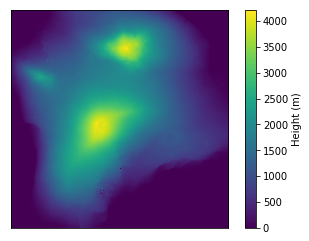

In [23]:
# Plot the heights
plt.imshow(data, vmin = 0)
clb = plt.colorbar()
clb.set_label('Height (m)')
# get rid of annoying ticks
plt.tick_params(axis='both', which='both', bottom='off', top='off', 
                labelbottom='off', right='off', left='off', labelleft='off')
plt.xlabel('Latitude 19N - x (arsceconds)')
plt.ylabel('Longitude 156W - y (arsceconds)')
plt.show()

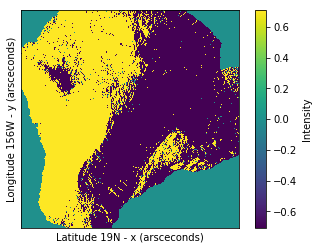

In [24]:
# Plot the intensities
plt.imshow(intensity)
clb = plt.colorbar()
clb.set_label('Intensity')
# get rid of annoying ticks
plt.tick_params(axis='both', which='both', bottom='off', top='off', 
                labelbottom='off', right='off', left='off', labelleft='off')
plt.xlabel('Latitude 19N - x (arsceconds)')
plt.ylabel('Longitude 156W - y (arsceconds)')
plt.show()

Here are some additional interesting features!

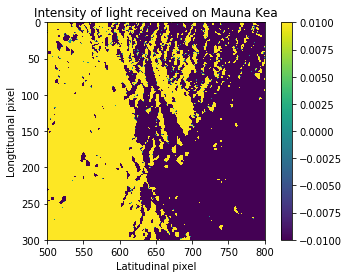

In [27]:
# Mauna Kea

plt.figure()
plt.imshow(intensity, vmin = -0.01, vmax = 0.01)
#plt.set_cmap('gray')
plt.title('Intensity of light received on Mauna Kea')
plt.xlabel('Latitudinal pixel')
plt.ylabel('Longtitudnal pixel')
plt.xlim(500,800)
plt.ylim(300,0)
plt.colorbar()
plt.show()

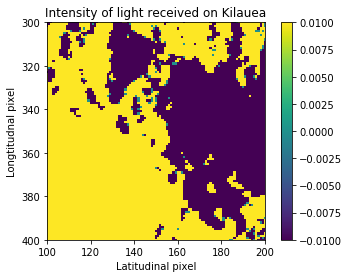

In [28]:
# Kilauea

plt.figure()
plt.imshow(intensity, vmin = -0.01, vmax = 0.01)
#plt.set_cmap('gray')
plt.title('Intensity of light received on Kilauea')
plt.xlabel('Latitudinal pixel')
plt.ylabel('Longtitudnal pixel')
plt.xlim(100,200)
plt.ylim(400,300)
plt.colorbar()
plt.show()

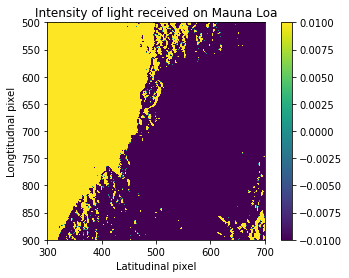

In [29]:
# Mauna Loa

plt.figure()
plt.imshow(intensity, vmin = -0.01, vmax = 0.01)
#plt.set_cmap('gray')
plt.title('Intensity of light received on Mauna Loa')
plt.xlabel('Latitudinal pixel')
plt.ylabel('Longtitudnal pixel')
plt.xlim(300,700)
plt.ylim(900,500)
plt.colorbar()
plt.show()